# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the libraries you will be using for analysis
!pip install numpy==1.26.4 pandas==2.2.2 matplotlib==3.10.0 seaborn==0.13.2 pyarrow

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


In [4]:
# need to mount the google drive to read the files (need to download the files into google drive)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [5]:
# Try loading one file

df = pd.read_parquet('/content/drive/MyDrive/Vaishu EDA Assignment/dataset/yellow_tripdata_2023-01.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

How many rows are there?
Do you think handling such a large number of rows is computationally feasible
when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [6]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os
#import pandas as pd

# Update this path to the correct location of your data files in Google Drive
data_folder_path = '/content/drive/MyDrive/Vaishu EDA Assignment/dataset'

# Create a list of all the parquet files for 2023
file_list = [f'yellow_tripdata_2023-{month:02d}.parquet' for month in range(1, 13)]

# initialise an empty dataframe
df = pd.DataFrame()

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(data_folder_path, file_name)

        # Reading the current file
        monthly_df = pd.read_parquet(file_path)

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data_month = pd.DataFrame()

        # Extract date and hour for sampling
        monthly_df['pickup_date'] = monthly_df['tpep_pickup_datetime'].dt.date
        monthly_df['pickup_hour'] = monthly_df['tpep_pickup_datetime'].dt.hour

        # Get unique dates in the month
        unique_dates = monthly_df['pickup_date'].unique()

        # Loop through dates and then loop through every hour of each date
        for date in unique_dates:
            daily_df = monthly_df[monthly_df['pickup_date'] == date]
            # Iterate through each hour of the selected date
            for hour in range(24):
                hour_data = daily_df[daily_df['pickup_hour'] == hour]
                if not hour_data.empty:
                    # Sample 5% of the hourly data randomly
                    sample = hour_data.sample(frac=0.05, random_state=42)
                    # add data of this hour to the dataframe
                    sampled_data_month = pd.concat([sampled_data_month, sample])

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data_month])

    except FileNotFoundError:
        print(f"Error: File not found: {file_name}. Skipping.")
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

# Drop the temporary columns
if 'pickup_date' in df.columns:
    df = df.drop(columns=['pickup_date', 'pickup_hour'])

print("Finished sampling and combining data.")
print(f"Total number of rows in combined dataframe: {len(df)}")

Finished sampling and combining data.
Total number of rows in combined dataframe: 1915511


In [7]:
# Store the df in csv/parquet
df.to_csv('yellow_taxi_trip.csv')

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [8]:
# Load the new data file
df1 = pd.read_csv('/content/drive/MyDrive/Vaishu EDA Assignment/dataset/yellow_taxi_trip.csv')

In [9]:
df1.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
0,1164,2,2023-01-01 00:10:30,2023-01-01 00:11:49,1.0,0.49,1.0,N,239,238,...,4.4,1.0,0.5,1.88,0.00,1.0,11.28,2.5,0.0,NaN
1,1868,2,2023-01-01 00:49:02,2023-01-01 00:55:15,1.0,0.75,1.0,N,45,148,...,7.9,1.0,0.5,0.00,0.00,1.0,12.90,2.5,0.0,NaN
2,3106,1,2023-01-01 00:47:17,2023-01-01 01:07:01,2.0,2.90,1.0,N,142,170,...,19.1,3.5,0.5,4.80,0.00,1.0,28.90,2.5,0.0,NaN
3,808,2,2023-01-01 00:06:02,2023-01-01 00:31:38,1.0,2.50,1.0,N,43,161,...,24.0,1.0,0.5,7.25,0.00,1.0,36.25,2.5,0.0,NaN
4,169,2,2023-01-01 00:02:19,2023-01-01 00:30:49,1.0,20.37,2.0,N,132,140,...,70.0,0.0,0.5,12.00,6.55,1.0,92.55,2.5,0.0,NaN


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915511 entries, 0 to 1915510
Data columns (total 21 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   VendorID               int64  
 2   tpep_pickup_datetime   object 
 3   tpep_dropoff_datetime  object 
 4   passenger_count        float64
 5   trip_distance          float64
 6   RatecodeID             float64
 7   store_and_fwd_flag     object 
 8   PULocationID           int64  
 9   DOLocationID           int64  
 10  payment_type           int64  
 11  fare_amount            float64
 12  extra                  float64
 13  mta_tax                float64
 14  tip_amount             float64
 15  tolls_amount           float64
 16  improvement_surcharge  float64
 17  total_amount           float64
 18  congestion_surcharge   float64
 19  airport_fee            float64
 20  Airport_fee            float64
dtypes: float64(13), int64(5), object(3)
memory usage: 306.

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [11]:
# Fix the index and drop any columns that are not needed
df1 = df1.drop(columns=['Unnamed: 0'])
df1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
0,2,2023-01-01 00:10:30,2023-01-01 00:11:49,1.0,0.49,1.0,N,239,238,1,4.4,1.0,0.5,1.88,0.00,1.0,11.28,2.5,0.0,NaN
1,2,2023-01-01 00:49:02,2023-01-01 00:55:15,1.0,0.75,1.0,N,45,148,2,7.9,1.0,0.5,0.00,0.00,1.0,12.90,2.5,0.0,NaN
2,1,2023-01-01 00:47:17,2023-01-01 01:07:01,2.0,2.90,1.0,N,142,170,1,19.1,3.5,0.5,4.80,0.00,1.0,28.90,2.5,0.0,NaN
3,2,2023-01-01 00:06:02,2023-01-01 00:31:38,1.0,2.50,1.0,N,43,161,1,24.0,1.0,0.5,7.25,0.00,1.0,36.25,2.5,0.0,NaN
4,2,2023-01-01 00:02:19,2023-01-01 00:30:49,1.0,20.37,2.0,N,132,140,1,70.0,0.0,0.5,12.00,6.55,1.0,92.55,2.5,0.0,NaN


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [12]:
# Combine the two airport fee columns
df1['airport_fee'] = df1['airport_fee'].fillna(df1['Airport_fee'])
df1 = df1.drop(columns=['Airport_fee'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915511 entries, 0 to 1915510
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  airport_fee            float64
dtypes: float64(12), int64(4), object(3)
memory usage: 277.7+ MB


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [14]:
# check where values of fare amount are negative
print("Rows with negative 'fare_amount':")
display(df1[df1['fare_amount'] < 0].head())

Rows with negative 'fare_amount':


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
51,2,2023-01-01 00:31:44,2023-01-01 00:51:27,2.0,5.21,1.0,N,186,144,4,-26.1,-1.0,-0.5,0.0,0.00,-1.0,-31.10,-2.5,0.00
138,2,2023-01-01 00:11:23,2023-01-01 00:24:21,1.0,2.14,1.0,N,137,144,4,-14.2,-1.0,-0.5,0.0,0.00,-1.0,-19.20,-2.5,0.00
170,2,2023-01-01 00:40:02,2023-01-01 01:07:56,1.0,9.90,1.0,N,90,67,4,-43.6,-1.0,-0.5,0.0,-6.55,-1.0,-55.15,-2.5,0.00
174,2,2023-01-01 00:33:21,2023-01-01 00:47:59,3.0,8.17,4.0,N,132,265,4,-39.4,-1.0,-0.5,0.0,0.00,-1.0,-43.15,0.0,-1.25
218,2,2023-01-01 00:40:34,2023-01-01 01:01:20,1.0,3.86,1.0,N,50,162,4,-21.9,-1.0,-0.5,0.0,0.00,-1.0,-26.90,-2.5,0.00


Did you notice something different in the `RatecodeID` column for above records?

In [15]:
# Analyse RatecodeID for the negative fare amounts
print("\nValue counts for 'RatecodeID' in rows with negative 'fare_amount':")
print(df1[df1['fare_amount'] < 0]['RatecodeID'].value_counts(dropna=False))


Value counts for 'RatecodeID' in rows with negative 'fare_amount':
RatecodeID
1.0    16721
2.0     1324
5.0      369
NaN      331
3.0      223
4.0       88
Name: count, dtype: int64


In [13]:
# Find which columns have negative values
negative_value_cols = []
for col in df1.select_dtypes(include=np.number).columns:
    if (df1[col] < 0).any():
        negative_value_cols.append(col)

print("Columns with negative values:", negative_value_cols)

Columns with negative values: ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']


In [16]:
# fix these negative values
for col in negative_value_cols:
    df1[col] = df1[col].apply(lambda x: x if x >= 0 else 0)
print("Negative values after fixing:")
for col in negative_value_cols:
    print(f"{col}: {(df1[col] < 0).sum()}")

Negative values after fixing:
fare_amount: 0
extra: 0
mta_tax: 0
tip_amount: 0
tolls_amount: 0
improvement_surcharge: 0
total_amount: 0
congestion_surcharge: 0
airport_fee: 0


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [17]:
# Find the proportion of missing values in each column
missing_values = df1.isnull().sum()
total_rows = len(df1)
missing_proportion = missing_values / total_rows
print("Proportion of missing values in each column:")
print(missing_proportion)

Proportion of missing values in each column:
VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.034007
trip_distance            0.000000
RatecodeID               0.034007
store_and_fwd_flag       0.034007
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.000000
airport_fee              0.000000
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [18]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
print("Rows with null values in 'passenger_count':")
display(df1[df1['passenger_count'].isnull()].head())
print("\nValue counts for 'passenger_count':")
print(df1['passenger_count'].value_counts(dropna=False))
mode_passenger_count = df1['passenger_count'].mode()[0]
df1['passenger_count'] = df1['passenger_count'].fillna(mode_passenger_count)
print("\nMissing values in 'passenger_count' after imputation:")
print(df1['passenger_count'].isnull().sum())
print("\nValue counts for 'passenger_count' AFTER IMPUTATION:")
print(df1['passenger_count'].value_counts(dropna=False))

Rows with null values in 'passenger_count':


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
5,2,2023-01-01 00:45:00,2023-01-01 01:21:00,NaN,6.00,NaN,NaN,234,225,0,38.77,0.0,0.5,0.00,0.0,1.0,42.77,0.0,0.0
6,2,2023-01-01 00:56:00,2023-01-01 01:08:45,NaN,2.89,NaN,NaN,181,17,0,17.17,0.0,0.5,3.73,0.0,1.0,22.40,0.0,0.0
38,2,2023-01-01 00:45:00,2023-01-01 01:04:00,NaN,5.25,NaN,NaN,256,162,0,28.36,0.0,0.5,2.27,0.0,1.0,34.63,0.0,0.0
79,2,2023-01-01 00:53:00,2023-01-01 01:05:18,NaN,4.46,NaN,NaN,238,244,0,22.26,0.0,0.5,5.00,0.0,1.0,31.26,0.0,0.0
103,2,2023-01-01 00:31:52,2023-01-01 01:04:54,NaN,2.31,NaN,NaN,68,161,0,18.41,0.0,0.5,3.36,0.0,1.0,25.77,0.0,0.0



Value counts for 'passenger_count':
passenger_count
1.0    1391536
2.0     280696
3.0      69652
NaN      65140
4.0      39250
0.0      29587
5.0      23720
6.0      15917
8.0         10
9.0          2
7.0          1
Name: count, dtype: int64

Missing values in 'passenger_count' after imputation:
0

Value counts for 'passenger_count' AFTER IMPUTATION:
passenger_count
1.0    1456676
2.0     280696
3.0      69652
4.0      39250
0.0      29587
5.0      23720
6.0      15917
8.0         10
9.0          2
7.0          1
Name: count, dtype: int64


In [19]:
# Handle zero values in 'passenger_count'
# Remove rows where passenger_count is 0 as it's not a valid taxi trip
df1 = df1[df1['passenger_count'] > 0].copy()

print("Number of rows after removing zero passenger counts:", len(df1))
print("\nValue counts for 'passenger_count' after removing zeros:")
print(df1['passenger_count'].value_counts(dropna=False))

Number of rows after removing zero passenger counts: 1885924

Value counts for 'passenger_count' after removing zeros:
passenger_count
1.0    1456676
2.0     280696
3.0      69652
4.0      39250
5.0      23720
6.0      15917
8.0         10
9.0          2
7.0          1
Name: count, dtype: int64


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [20]:
# Fix missing values in 'RatecodeID'
print("Missing values in 'RatecodeID' before handling:", df1['RatecodeID'].isnull().sum())
print("\nValue counts for 'RatecodeID':")
print(df1['RatecodeID'].value_counts(dropna=False))
mode_ratecode_id = df1['RatecodeID'].mode()[0]
df1['RatecodeID'] = df1['RatecodeID'].fillna(mode_ratecode_id)
print("\nMissing values in 'RatecodeID' after imputation:")
print(df1['RatecodeID'].isnull().sum())

Missing values in 'RatecodeID' before handling: 65140

Value counts for 'RatecodeID':
RatecodeID
1.0     1717406
2.0       72252
NaN       65140
5.0       10697
99.0      10351
3.0        6295
4.0        3779
6.0           4
Name: count, dtype: int64

Missing values in 'RatecodeID' after imputation:
0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [21]:
# handle null values in congestion_surcharge
print("Missing values in 'congestion_surcharge' before handling:", df1['congestion_surcharge'].isnull().sum())
print("\nValue counts for 'congestion_surcharge':")
print(df1['congestion_surcharge'].value_counts(dropna=False))
df1['congestion_surcharge'] = df1['congestion_surcharge'].fillna(0)
print("\nMissing values in 'congestion_surcharge' after imputation:")
print(df1['congestion_surcharge'].isnull().sum())

Missing values in 'congestion_surcharge' before handling: 0

Value counts for 'congestion_surcharge':
congestion_surcharge
2.5    1662457
0.0     223465
1.0          2
Name: count, dtype: int64

Missing values in 'congestion_surcharge' after imputation:
0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [22]:
# Handle any remaining missing values
print("Missing values in each column after previous steps:")
print(df1.isnull().sum())
if 'store_and_fwd_flag' in df1.columns and df1['store_and_fwd_flag'].isnull().sum() > 0:
    mode_store_and_fwd_flag = df1['store_and_fwd_flag'].mode()[0]
    df1['store_and_fwd_flag'] = df1['store_and_fwd_flag'].fillna(mode_store_and_fwd_flag)
    print("\nMissing values in 'store_and_fwd_flag' after imputation:")
    print(df1['store_and_fwd_flag'].isnull().sum())
critical_cols_with_missing = ['tpep_dropoff_datetime', 'trip_distance', 'PULocationID', 'DOLocationID', 'payment_type']
initial_rows = len(df1)
df1.dropna(subset=critical_cols_with_missing, inplace=True)
rows_removed = initial_rows - len(df1)
print(f"\nRemoved {rows_removed} row(s) with missing values in critical columns.")

print("\nMissing values in each column after handling remaining NaNs:")
print(df1.isnull().sum())

Missing values in each column after previous steps:
VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
store_and_fwd_flag       65140
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
airport_fee                  0
dtype: int64

Missing values in 'store_and_fwd_flag' after imputation:
0

Removed 0 row(s) with missing values in critical columns.

Missing values in each column after handling remaining NaNs:
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
sto

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [23]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
display(df1.describe().T)

,count,mean,std,min,25%,50%,75%,max
VendorID,1885924.0,1.747144,0.439719,1.0,1.00,2.00,2.00,6.00
passenger_count,1885924.0,1.377697,0.868219,1.0,1.00,1.00,1.00,9.00
trip_distance,1885924.0,4.240342,266.372250,0.0,1.04,1.79,3.40,159017.60
RatecodeID,1885924.0,1.611576,7.245592,1.0,1.00,1.00,1.00,99.00
PULocationID,1885924.0,165.194961,64.023197,1.0,132.00,162.00,234.00,265.00
DOLocationID,1885924.0,163.894141,69.875249,1.0,113.00,162.00,234.00,265.00
payment_type,1885924.0,1.184269,0.557311,0.0,1.00,1.00,1.00,4.00
fare_amount,1885924.0,19.689209,18.353558,0.0,9.30,13.50,21.90,904.60
extra,1885924.0,1.545171,1.816939,0.0,0.00,1.00,2.50,20.80
mta_tax,1885924.0,0.490314,0.069290,0.0,0.50,0.50,0.50,5.75


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [24]:
# remove passenger_count > 6
df1 = df1[df1['passenger_count'] <= 6].copy()
print("Number of rows after removing passenger counts > 6:", len(df1))
print("\nValue counts for 'passenger_count' after removing > 6:")
print(df1['passenger_count'].value_counts(dropna=False))

Number of rows after removing passenger counts > 6: 1885911

Value counts for 'passenger_count' after removing > 6:
passenger_count
1.0    1456676
2.0     280696
3.0      69652
4.0      39250
5.0      23720
6.0      15917
Name: count, dtype: int64


In [25]:
# Fix trips where payment_type is 0
df1 = df1[df1['payment_type'] != 0].copy()

print("Number of rows after removing payment_type 0:", len(df1))
print("\nValue counts for 'payment_type' after removing 0:")
print(df1['payment_type'].value_counts(dropna=False))

Number of rows after removing payment_type 0: 1820771

Value counts for 'payment_type' after removing 0:
payment_type
1    1469280
2     315162
4      24835
3      11494
Name: count, dtype: int64


In [26]:
# Handle trips with 0 distance and 0 fare but different zones
initial_rows = len(df1)
df1 = df1[~((df1['trip_distance'] == 0) & (df1['fare_amount'] == 0) &
 (df1['PULocationID'] != df1['DOLocationID']))].copy()
rows_removed = initial_rows - len(df1)
print(f"""Removed {rows_removed} rows where trip_distance and fare_amount were
0 but pickup and dropoff zones were different.""")

Removed 157 rows where trip_distance and fare_amount were
0 but pickup and dropoff zones were different.


In [27]:
# Handle entries where trip_distance is more than 250 miles
initial_rows = len(df1)
df1 = df1[df1['trip_distance'] <= 250].copy()
rows_removed = initial_rows - len(df1)
print(f"Removed {rows_removed} rows where trip_distance was more than 250 miles.")

Removed 17 rows where trip_distance was more than 250 miles.


In [28]:
# Do any columns need standardising?
print(df1.dtypes)

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
airport_fee              float64
dtype: object


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [29]:
df1.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:  
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

hourly_pickups<bound method IndexOpsMixin.value_counts of pickup_hour
0      51357
1      34371
2      22686
3      14830
4       9575
5      10089
6      24346
7      48458
8      67558
9      77256
10     84870
11     92234
12    100138
13    103169
14    110699
15    113376
16    113455
17    122707
18    128339
19    115216
20    103110
21    102865
22     94987
23     74906
Name: count, dtype: int64>


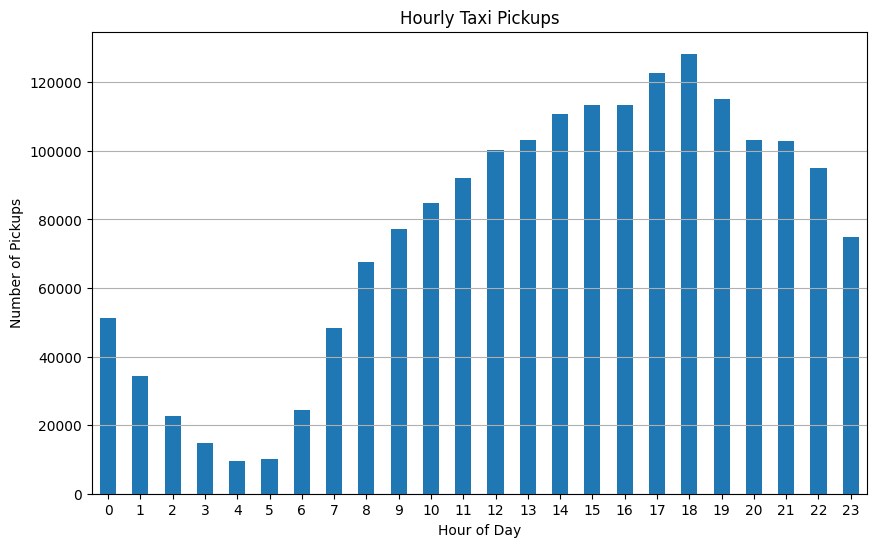

In [30]:
# Find and show the hourly trends in taxi pickups
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])
df1['pickup_hour'] = df1['tpep_pickup_datetime'].dt.hour
hourly_pickups = df1['pickup_hour'].value_counts().sort_index()
print("hourly_pickups"+str(hourly_pickups.value_counts))
plt.figure(figsize=(10, 6))
hourly_pickups.plot(kind='bar')
plt.title('Hourly Taxi Pickups')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

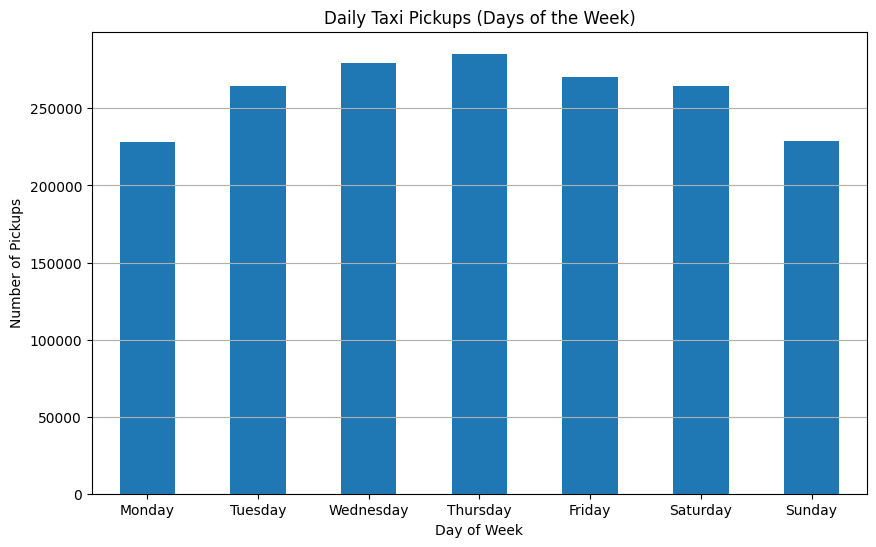

In [31]:
# Find and show the daily trends in taxi pickups (days of the week)
df1['pickup_day_of_week'] = df1['tpep_pickup_datetime'].dt.dayofweek
daily_pickups = df1['pickup_day_of_week'].value_counts().sort_index()
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
daily_pickups.index = daily_pickups.index.map(day_names)
plt.figure(figsize=(10, 6))
daily_pickups.plot(kind='bar')
plt.title('Daily Taxi Pickups (Days of the Week)')
plt.xlabel('Day of Week')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [32]:
# Check the unique days of the week present in the dataframe
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])
unique_days_of_week = df1['tpep_pickup_datetime'].dt.dayofweek.unique()
print("Unique days of the week present in the combined dataframe (0=Monday, 6=Sunday):", sorted(unique_days_of_week))

# Check the number of entries for each day of the week
print("\nNumber of entries per day of the week:")
print(df1['tpep_pickup_datetime'].dt.dayofweek.value_counts().sort_index())

Unique days of the week present in the combined dataframe (0=Monday, 6=Sunday): [0, 1, 2, 3, 4, 5, 6]

Number of entries per day of the week:
tpep_pickup_datetime
0    227884
1    264264
2    279557
3    285443
4    270158
5    264315
6    228976
Name: count, dtype: int64


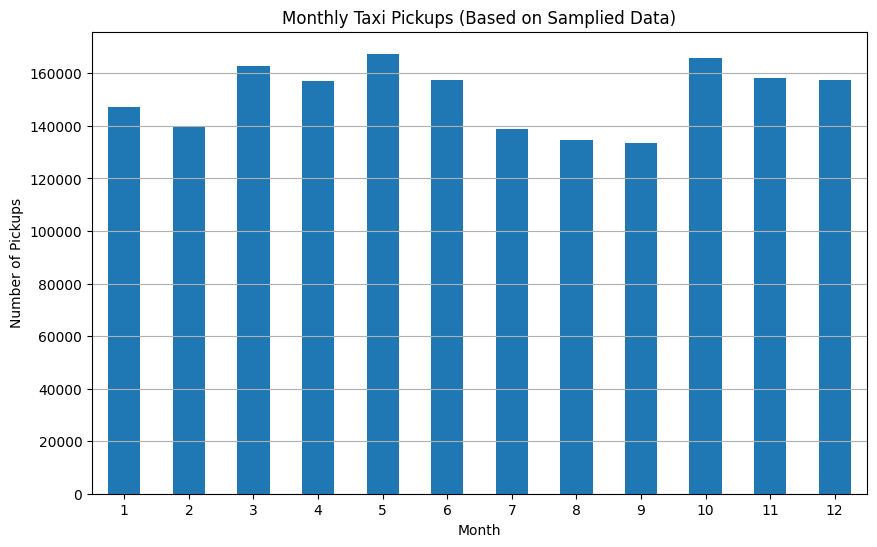

In [33]:
# Show the monthly trends in pickups
df1['pickup_month'] = df1['tpep_pickup_datetime'].dt.month
monthly_pickups = df1['pickup_month'].value_counts().sort_index()
all_months = pd.DataFrame({'pickup_month': range(1, 13)})
monthly_pickups = pd.merge(all_months, monthly_pickups, on='pickup_month', how='left').fillna(0)
monthly_pickups = monthly_pickups.set_index('pickup_month')['count']

plt.figure(figsize=(10, 6))
monthly_pickups.plot(kind='bar')
plt.title('Monthly Taxi Pickups (Based on Samplied Data)')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [ ]:
# Check which months are present in the combined dataframe
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])
unique_months_in_df = df1['tpep_pickup_datetime'].dt.month.unique()
print("Unique months present in the combined dataframe:", sorted(unique_months_in_df))

Unique months present in the combined dataframe: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [34]:
# Analyse the above parameters
financial_cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

print("Number of zero values in key financial columns and trip distance:")
for col in financial_cols:
    zero_count = (df1[col] == 0).sum()
    print(f"{col}: {zero_count}")

Number of zero values in key financial columns and trip distance:
fare_amount: 19186
tip_amount: 420575
total_amount: 18980
trip_distance: 24264


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [36]:
# Create a df with non zero entries for the selected parameters.
financial_cols_and_distance = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
df1_filtered = df1[(df1[financial_cols_and_distance] != 0).all(axis=1)].copy()

print(f"Original number of rows: {len(df1)}")
print(f"Number of rows after removing zero values: {len(df1_filtered)}")

Original number of rows: 1820597
Number of rows after removing zero values: 1391636


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [37]:
# Group data by month and analyse monthly revenue
df1_filtered['pickup_month'] = df1_filtered['tpep_pickup_datetime'].dt.month
monthly_revenue = df1_filtered.groupby('pickup_month')['total_amount'].sum()
print("Monthly Revenue:")
print(monthly_revenue)

Monthly Revenue:
pickup_month
1     3175817.62
2     3033279.65
3     3636879.68
4     3527199.92
5     3863039.74
6     3621873.68
7     3068441.26
8     2961840.57
9     3155540.24
10    3922610.91
11    3676866.59
12    3581192.21
Name: total_amount, dtype: float64


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [38]:
# Calculate proportion of each quarter
quarter_map = {
    1: 'Q1', 2: 'Q1', 3: 'Q1',
    4: 'Q2', 5: 'Q2', 6: 'Q2',
    7: 'Q3', 8: 'Q3', 9: 'Q3',
    10: 'Q4', 11: 'Q4', 12: 'Q4'
}
df1_filtered['pickup_quarter'] = df1_filtered['tpep_pickup_datetime'].dt.month.map(quarter_map)
quarterly_revenue = df1_filtered.groupby('pickup_quarter')['total_amount'].sum().reindex(['Q1', 'Q2', 'Q3', 'Q4'])
total_revenue = quarterly_revenue.sum()
quarterly_revenue_proportion = quarterly_revenue / total_revenue
print("\nQuarterly Revenue Proportion:")
print(quarterly_revenue_proportion)


Quarterly Revenue Proportion:
pickup_quarter
Q1    0.238838
Q2    0.267125
Q3    0.222824
Q4    0.271214
Name: total_amount, dtype: float64


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

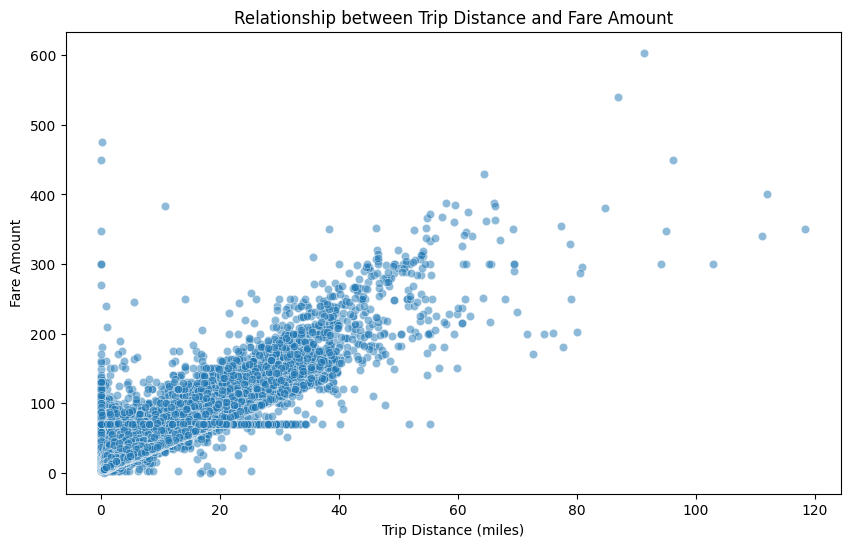


Correlation between trip_distance and fare_amount: 0.95


In [39]:
# Show how trip fare is affected by distance
df_filtered_distance = df1_filtered[df1_filtered['trip_distance'] > 0].copy()
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered_distance, x='trip_distance', y='fare_amount', alpha=0.5)
plt.title('Relationship between Trip Distance and Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount')
plt.show()
correlation = df_filtered_distance['trip_distance'].corr(df_filtered_distance['fare_amount'])
print(f"\nCorrelation between trip_distance and fare_amount: {correlation:.2f}")

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

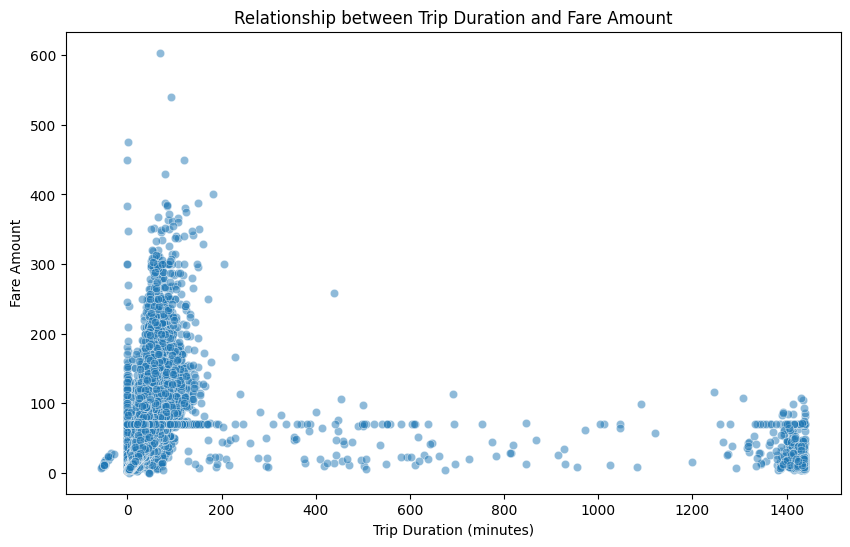


Correlation between trip_duration and fare_amount: 0.32


In [40]:
# Show relationship between fare and trip duration
df1_filtered['tpep_pickup_datetime'] = pd.to_datetime(df1_filtered['tpep_pickup_datetime'])
df1_filtered['tpep_dropoff_datetime'] = pd.to_datetime(df1_filtered['tpep_dropoff_datetime'])
df1_filtered['trip_duration'] = (df1_filtered['tpep_dropoff_datetime'] - df1_filtered['tpep_pickup_datetime']).dt.total_seconds() / 60
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1_filtered, x='trip_duration', y='fare_amount', alpha=0.5)
plt.title('Relationship between Trip Duration and Fare Amount')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount')
plt.show()
correlation_duration_fare = df1_filtered['trip_duration'].corr(df1_filtered['fare_amount'])
print(f"\nCorrelation between trip_duration and fare_amount: {correlation_duration_fare:.2f}")

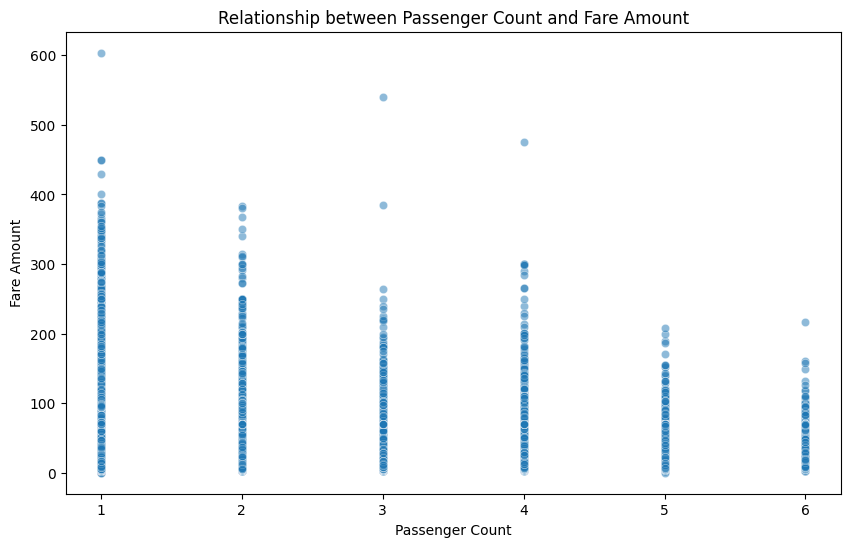


Correlation between passenger_count and fare_amount: 0.04


In [41]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1_filtered, x='passenger_count', y='fare_amount', alpha=0.5)
plt.title('Relationship between Passenger Count and Fare Amount')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount')
plt.show()
correlation_passenger_fare = df1_filtered['passenger_count'].corr(df1_filtered['fare_amount'])
print(f"\nCorrelation between passenger_count and fare_amount: {correlation_passenger_fare:.2f}")

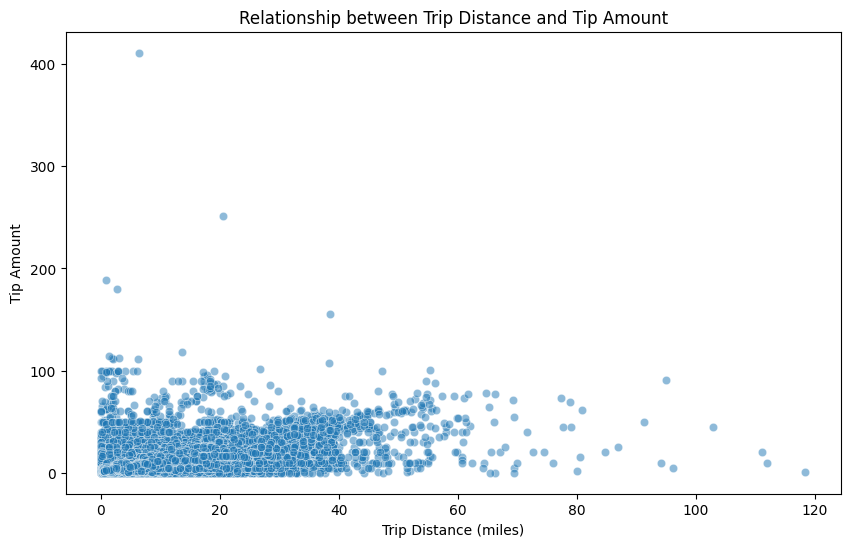


Correlation between trip_distance and tip_amount: 0.80


In [42]:
# Show relationship between trip and trip distance
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1_filtered, x='trip_distance', y='tip_amount', alpha=0.5)
plt.title('Relationship between Trip Distance and Tip Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount')
plt.show()
correlation_distance_tip = df1_filtered['trip_distance'].corr(df1_filtered['tip_amount'])
print(f"\nCorrelation between trip_distance and tip_amount: {correlation_distance_tip:.2f}")

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

Distribution of Payment Types:
 payment_type
1    1391592
2         26
4         14
3          4
Name: count, dtype: int64


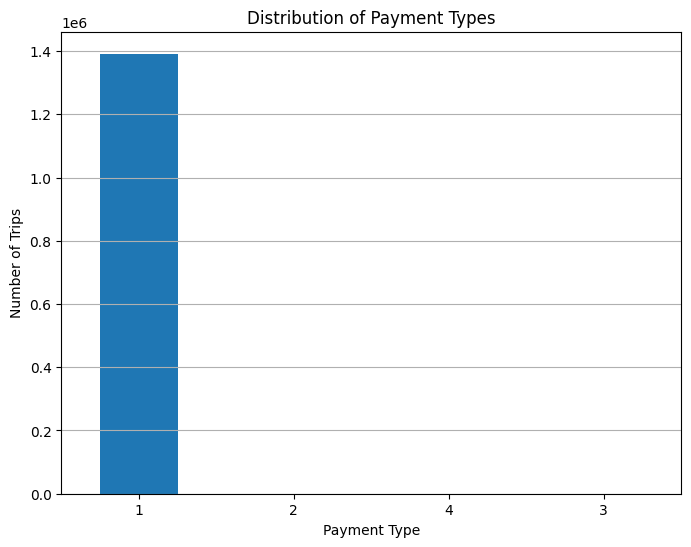

In [43]:
# Analyse the distribution of different payment types (payment_type).
payment_type_counts = df1_filtered['payment_type'].value_counts()
print("Distribution of Payment Types:\n", payment_type_counts)
plt.figure(figsize=(8, 6))
payment_type_counts.plot(kind='bar')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [44]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [45]:
import geopandas as gpd
f_path = "/content/drive/MyDrive/Vaishu EDA Assignment/taxi_zones/taxi_zones.shp"
# Read the shapefile using geopandas
zones = gpd.read_file(f_path) # read the .shp file using gpd
zones.head()
zones.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

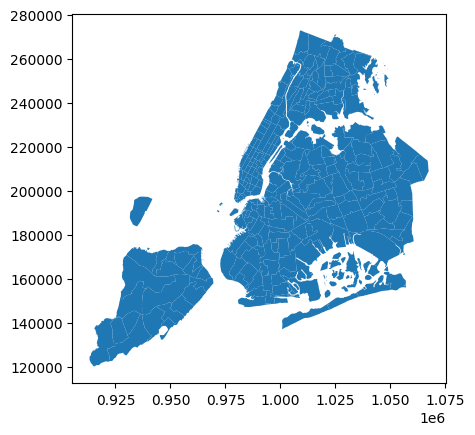

In [46]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [47]:
# Merge zones and trip records using locationID and PULocationID
merged_df = df1_filtered.merge(zones, left_on='PULocationID', right_on='LocationID', how='left')
print("Merged DataFrame info:")
merged_df.info()

Merged DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391660 entries, 0 to 1391659
Data columns (total 31 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1391660 non-null  int64         
 1   tpep_pickup_datetime   1391660 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  1391660 non-null  datetime64[ns]
 3   passenger_count        1391660 non-null  float64       
 4   trip_distance          1391660 non-null  float64       
 5   RatecodeID             1391660 non-null  float64       
 6   store_and_fwd_flag     1391660 non-null  object        
 7   PULocationID           1391660 non-null  int64         
 8   DOLocationID           1391660 non-null  int64         
 9   payment_type           1391660 non-null  int64         
 10  fare_amount            1391660 non-null  float64       
 11  extra                  1391660 non-null  float64       
 12  mta_t

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [48]:
# Group data by location and calculate the number of trips
trips_per_zone = merged_df['PULocationID'].value_counts().reset_index()
trips_per_zone.columns = ['LocationID', 'number_of_trips']
print("Total trips per zone (first 5):")
print(trips_per_zone.head())

Total trips per zone (first 5):
   LocationID  number_of_trips
0         237            68897
1         161            66533
2         132            63167
3         236            62323
4         162            51587


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [49]:
# Merge trip counts back to the zones GeoDataFrame
zones_with_trips = zones.merge(trips_per_zone, left_on='LocationID', right_on='LocationID', how='left')
zones_with_trips['number_of_trips'] = zones_with_trips['number_of_trips'].fillna(0)
print("Zones GeoDataFrame with trip counts (first 5):")
display(zones_with_trips.head())

Zones GeoDataFrame with trip counts (first 5):


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,number_of_trips
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",37.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",0.0
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",1.0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",1385.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",0.0


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

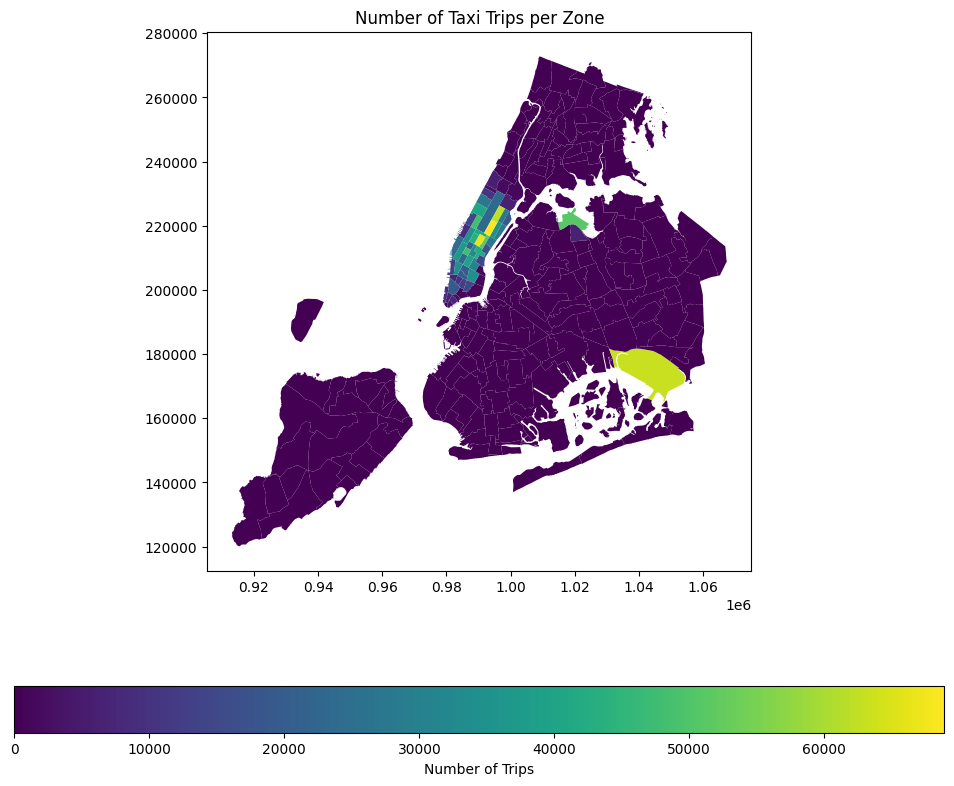

In [50]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
# Plot the map and display it
zones_with_trips.plot(column='number_of_trips', ax=ax, legend=True,
                      legend_kwds={'label': "Number of Trips", 'orientation': "horizontal"})
plt.title('Number of Taxi Trips per Zone')
plt.show()

In [51]:
# can you try displaying the zones DF sorted by the number of trips?
zones_sorted_by_trips = zones_with_trips.sort_values(by='number_of_trips', ascending=False)
print("Zones sorted by number of trips:")
display(zones_sorted_by_trips.head())
display(zones_sorted_by_trips.tail())

Zones sorted by number of trips:


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,number_of_trips
236,237,0.042213,0.000096,Upper East Side South,237,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21...",68897.0
160,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21...",66533.0
131,132,0.245479,0.002038,JFK Airport,132,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283...",63167.0
235,236,0.044252,0.000103,Upper East Side North,236,Manhattan,"POLYGON ((995940.048 221122.92, 995812.322 220...",62323.0
161,162,0.035270,0.000048,Midtown East,162,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21...",51587.0


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,number_of_trips
175,176,0.151995,0.000658,Oakwood,176,Staten Island,"POLYGON ((950393.94 148827.195, 950393.983 148...",0.0
174,175,0.134898,0.000505,Oakland Gardens,175,Queens,"POLYGON ((1051776.198 215687.328, 1051892.956 ...",0.0
21,22,0.126170,0.000472,Bensonhurst West,22,Brooklyn,"POLYGON ((986318.162 166716.417, 987000.047 16...",0.0
77,78,0.093594,0.000191,East Tremont,78,Bronx,"POLYGON ((1014782.254 250130.965, 1014697.776 ...",0.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",0.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [52]:
# Calculate trip duration in minutes
df1_filtered['trip_duration'] = (df1_filtered['tpep_dropoff_datetime'] - df1_filtered['tpep_pickup_datetime']).dt.total_seconds() / 60
df1_filtered['speed'] = df1_filtered['trip_distance'] / df1_filtered['trip_duration'].replace(0, np.nan)
average_speed_by_route_hour = df1_filtered.groupby(['PULocationID', 'DOLocationID', 'pickup_hour'])['speed'].mean().reset_index()
slowest_routes = average_speed_by_route_hour.sort_values(by='speed', ascending=True)
print("Slowest routes (first 10):")
display(slowest_routes.head(10))

Slowest routes (first 10):


,PULocationID,DOLocationID,pickup_hour,speed
33233,125,113,16,-0.275508
58589,161,125,16,-0.244926
69111,181,89,1,-0.115849
72681,209,209,14,0.000357
74654,216,216,7,0.000371
2282,13,211,0,0.000954
7244,45,211,10,0.000993
20,1,264,11,0.001453
82667,233,43,22,0.001512
62488,163,89,19,0.001844


How does identifying high-traffic, high-demand routes help us?

Understanding the flow of traffic on these routes helps in identifying potential bottlenecks and optimizing routes for faster travel times

may be Deploying more taxis to these areas during peak hours can reduce passenger waiting times and maximize the number of trips completed

Increased Revenue

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

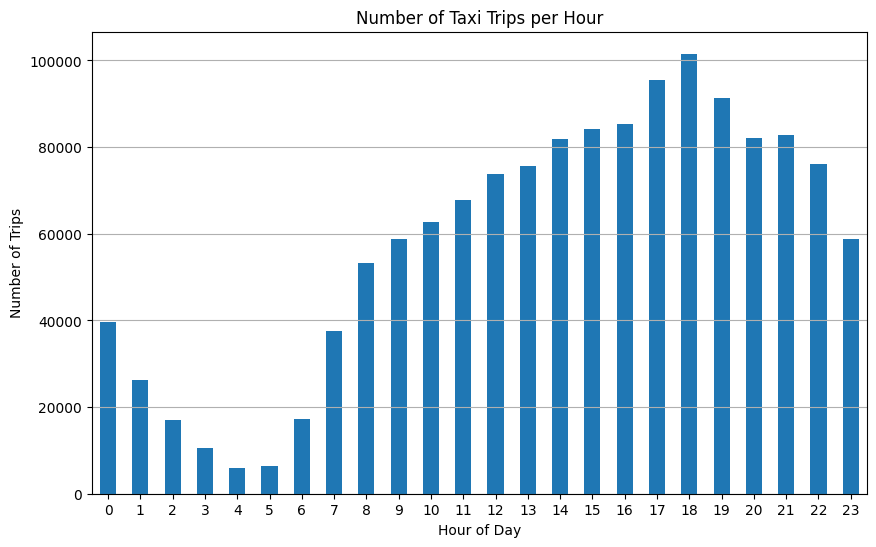


Busiest hour: 18
 Number of trips during the busiest hour: 101552


In [53]:
# Visualise the number of trips per hour and find the busiest hour
hourly_trips = df1_filtered['pickup_hour'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
hourly_trips.plot(kind='bar')
plt.title('Number of Taxi Trips per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()
busiest_hour = hourly_trips.idxmax()
busiest_hour_trips = hourly_trips.max()
print(f"\nBusiest hour: {busiest_hour}\n Number of trips during the busiest hour: {busiest_hour_trips}")

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [54]:
# Scale up the number of trips
# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05
scaled_total_trips = len(df1) / sample_fraction
print(f"Sampled total trips: {len(df1)}")
print(f"Scaled estimated total trips for the year: {scaled_total_trips:,.0f}")
scaled_busiest_hour_trips = busiest_hour_trips / sample_fraction
print(f"Scaled estimated trips during the busiest hour ({busiest_hour}): {scaled_busiest_hour_trips:,.0f}")

Sampled total trips: 1820597
Scaled estimated total trips for the year: 36,411,940
Scaled estimated trips during the busiest hour (18): 2,031,040


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

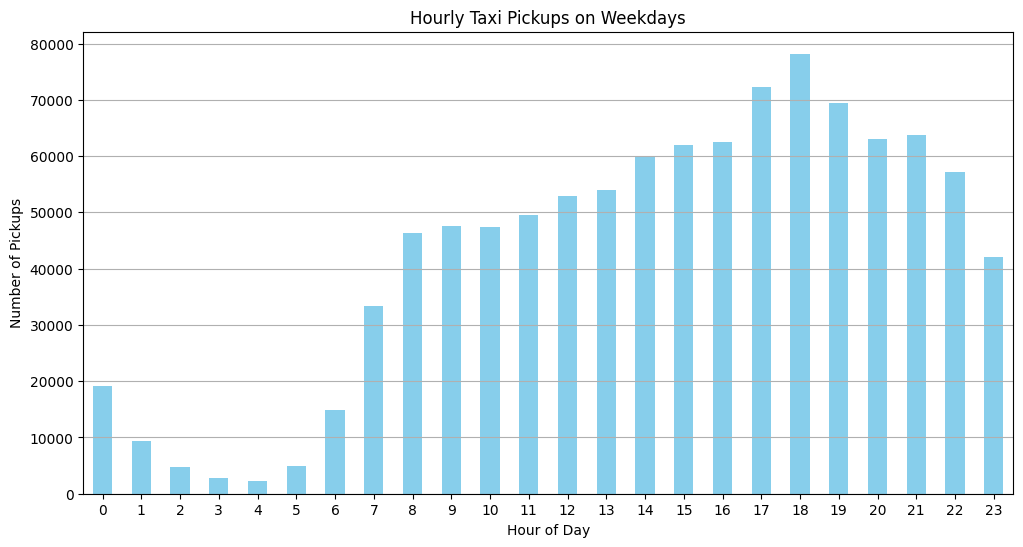

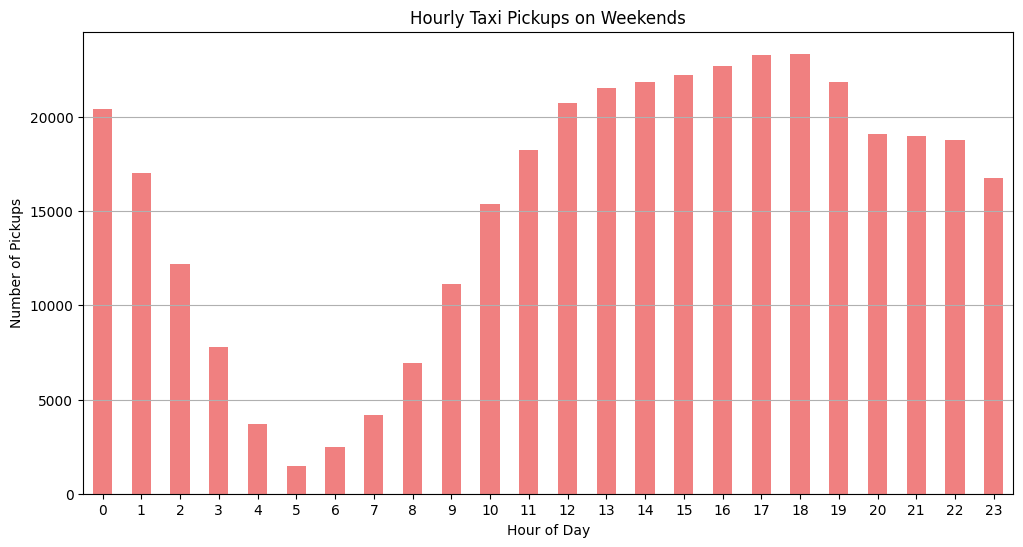

In [55]:
# Compare traffic trends for the week days and weekends
df1_filtered['pickup_day_of_week'] = df1_filtered['tpep_pickup_datetime'].dt.dayofweek
weekday_df = df1_filtered[df1_filtered['pickup_day_of_week'] < 5].copy()
weekend_df = df1_filtered[df1_filtered['pickup_day_of_week'] >= 5].copy()
hourly_trips_weekday = weekday_df['pickup_hour'].value_counts().sort_index()
hourly_trips_weekend = weekend_df['pickup_hour'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
hourly_trips_weekday.plot(kind='bar', color='skyblue')
plt.title('Hourly Taxi Pickups on Weekdays')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(12, 6))
hourly_trips_weekend.plot(kind='bar', color='lightcoral')
plt.title('Hourly Taxi Pickups on Weekends')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [56]:
# Find top 10 pickup and dropoff zones
top_10_pickup_zones = df1_filtered['PULocationID'].value_counts().head(10).reset_index()
top_10_pickup_zones.columns = ['PULocationID', 'number_of_pickups']
print("Top 10 Pickup Zones:")
display(top_10_pickup_zones)
top_10_dropoff_zones = df1_filtered['DOLocationID'].value_counts().head(10).reset_index()
top_10_dropoff_zones.columns = ['DOLocationID', 'number_of_dropoffs']
print("\nTop 10 Dropoff Zones:")
display(top_10_dropoff_zones)

Top 10 Pickup Zones:


,PULocationID,number_of_pickups
0,237,68897
1,161,66533
2,132,63167
3,236,62323
4,162,51587
5,138,51011
6,142,47987
7,186,47825
8,230,43666
9,170,42193



Top 10 Dropoff Zones:


,DOLocationID,number_of_dropoffs
0,236,66523
1,237,61775
2,161,54798
3,239,42367
4,170,42303
5,142,40703
6,162,40262
7,141,39103
8,230,38832
9,68,35258


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [57]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts = df1_filtered['PULocationID'].value_counts().reset_index()
pickup_counts.columns = ['LocationID', 'pickup_count']
dropoff_counts = df1_filtered['DOLocationID'].value_counts().reset_index()
dropoff_counts.columns = ['LocationID', 'dropoff_count']
zone_counts = pd.merge(pickup_counts, dropoff_counts, on='LocationID', how='outer').fillna(0)
zone_counts['pickup_dropoff_ratio'] = zone_counts['pickup_count'] / (zone_counts['dropoff_count'] + 1e-6)
top_10_ratio = zone_counts.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)
bottom_10_ratio = zone_counts.sort_values(by='pickup_dropoff_ratio', ascending=True).head(10)
print("Top 10 Pickup/Dropoff Ratios:")
display(top_10_ratio)
print("\nBottom 10 Pickup/Dropoff Ratios:")
display(bottom_10_ratio)

Top 10 Pickup/Dropoff Ratios:


,LocationID,pickup_count,dropoff_count,pickup_dropoff_ratio
193,199,1.0,0.0,1000000.000000
69,70,6383.0,465.0,13.726882
126,132,63167.0,13433.0,4.702375
132,138,51011.0,17466.0,2.920589
180,186,47825.0,29014.0,1.648342
108,114,19531.0,14017.0,1.393379
42,43,23327.0,17008.0,1.371531
243,249,33637.0,25215.0,1.334008
156,162,51587.0,40262.0,1.281283
98,100,21144.0,17357.0,1.218183



Bottom 10 Pickup/Dropoff Ratios:


,LocationID,pickup_count,dropoff_count,pickup_dropoff_ratio
21,22,0.0,126.0,0.0
215,221,0.0,16.0,0.0
58,59,0.0,8.0,0.0
57,58,0.0,23.0,0.0
26,27,0.0,17.0,0.0
166,172,0.0,4.0,0.0
204,210,0.0,106.0,0.0
29,30,0.0,5.0,0.0
168,174,0.0,68.0,0.0
22,23,0.0,24.0,0.0


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [58]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_hours_df = df1_filtered[
    (df1_filtered['pickup_hour'] >= 23) | (df1_filtered['pickup_hour'] < 5)
].copy()
top_10_night_pickup_zones = night_hours_df['PULocationID'].value_counts().head(10).reset_index()
top_10_night_pickup_zones.columns = ['PULocationID', 'number_of_night_pickups']
print("Top 10 Nighttime Pickup Zones (11 PM - 5 AM):")
display(top_10_night_pickup_zones)
top_10_night_dropoff_zones = night_hours_df['DOLocationID'].value_counts().head(10).reset_index()
top_10_night_dropoff_zones.columns = ['DOLocationID', 'number_of_night_dropoffs']
print("\nTop 10 Nighttime Dropoff Zones (11 PM - 5 AM):")
display(top_10_night_dropoff_zones)

Top 10 Nighttime Pickup Zones (11 PM - 5 AM):


,PULocationID,number_of_night_pickups
0,79,12501
1,249,10326
2,132,8811
3,148,7824
4,48,7478
5,114,7230
6,230,5479
7,186,4857
8,138,4703
9,164,4674



Top 10 Nighttime Dropoff Zones (11 PM - 5 AM):


,DOLocationID,number_of_night_dropoffs
0,79,6642
1,48,5100
2,170,4772
3,107,4655
4,141,4356
5,263,4232
6,68,4168
7,249,4063
8,236,3582
9,229,3567


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [59]:
# Filter for night hours (11 PM to 5 AM)
night_hours_df = df1_filtered[
    (df1_filtered['pickup_hour'] >= 23) | (df1_filtered['pickup_hour'] < 5)
].copy()
night_revenue = night_hours_df['total_amount'].sum()
total_revenue = df1_filtered['total_amount'].sum()
night_revenue_share = night_revenue / total_revenue
print(f"Nighttime Revenue (11 PM - 5 AM): ${night_revenue:,.2f}")
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Nighttime Revenue Share: {night_revenue_share:.2%}")
daytime_revenue = total_revenue - night_revenue
daytime_revenue_share = daytime_revenue / total_revenue

print(f"\nDaytime Revenue: ${daytime_revenue:,.2f}")
print(f"Daytime Revenue Share: {daytime_revenue_share:.2%}")

Nighttime Revenue (11 PM - 5 AM): $4,666,720.00
Total Revenue: $41,224,582.07
Nighttime Revenue Share: 11.32%

Daytime Revenue: $36,557,862.07
Daytime Revenue Share: 88.68%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [60]:
# Analyse the fare per mile per passenger for different passenger counts
df1_filtered['fare_per_mile_per_passenger'] = df1_filtered['fare_amount'] / (df1_filtered['trip_distance'].replace(0, np.nan)
* df1_filtered['passenger_count'].replace(0, np.nan))
average_fare_per_mile_per_passenger = df1_filtered.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()
print("Average Fare per Mile per Passenger for Different Passenger Counts:")
display(average_fare_per_mile_per_passenger)

Average Fare per Mile per Passenger for Different Passenger Counts:


,passenger_count,fare_per_mile_per_passenger
0,1.0,9.269508
1,2.0,5.282259
2,3.0,3.490572
3,4.0,4.256864
4,5.0,1.535935
5,6.0,1.365900


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [61]:
# Compare the average fare per mile for different days and for different times of the day
df1_filtered['fare_per_mile'] = df1_filtered['fare_amount'] / df1_filtered['trip_distance'].replace(0, np.nan)
average_fare_per_mile_by_day = df1_filtered.groupby('pickup_day_of_week')['fare_per_mile'].mean().reset_index()
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
average_fare_per_mile_by_day['pickup_day_of_week'] = average_fare_per_mile_by_day['pickup_day_of_week'].map(day_names)
print("Average Fare per Mile by Day of the Week:")
display(average_fare_per_mile_by_day)
average_fare_per_mile_by_hour = df1_filtered.groupby('pickup_hour')['fare_per_mile'].mean().reset_index()
print("\nAverage Fare per Mile by Hour of the Day:")
display(average_fare_per_mile_by_hour)

Average Fare per Mile by Day of the Week:


,pickup_day_of_week,fare_per_mile
0,Monday,9.397545
1,Tuesday,9.510813
2,Wednesday,9.352389
3,Thursday,10.118252
4,Friday,9.605018
5,Saturday,9.389702
6,Sunday,9.940808



Average Fare per Mile by Hour of the Day:


,pickup_hour,fare_per_mile
0,0,10.349793
1,1,8.144467
2,2,7.974625
3,3,8.236583
4,4,11.306763
5,5,11.271275
6,6,8.234898
7,7,9.004952
8,8,9.004462
9,9,9.439142


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [62]:
# Compare fare per mile for different vendors
average_fare_per_mile_by_vendor = df1_filtered.groupby('VendorID')['fare_per_mile'].mean().reset_index()

print("Average Fare per Mile by VendorID:")
display(average_fare_per_mile_by_vendor)

Average Fare per Mile by VendorID:


,VendorID,fare_per_mile
0,1,7.899321
1,2,10.172882


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [63]:
# Defining distance tiers
distance_bins = [0, 2, 5, float('inf')]
distance_labels = ['0-2 miles', '2-5 miles', '> 5 miles']
df1_filtered['distance_tier'] = pd.cut(df1_filtered['trip_distance'], bins=distance_bins, labels=distance_labels, right=False)
average_fare_per_mile_by_vendor_tier = df1_filtered.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()
print("Average Fare per Mile by Vendor and Distance Tier:")
display(average_fare_per_mile_by_vendor_tier)

Average Fare per Mile by Vendor and Distance Tier:


,VendorID,distance_tier,fare_per_mile
0,1,0-2 miles,9.588194
1,1,2-5 miles,6.435918
2,1,> 5 miles,4.484402
3,2,0-2 miles,13.899232
4,2,2-5 miles,6.552313
5,2,> 5 miles,4.510805


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [64]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
df1_filtered['tip_percentage'] = (df1_filtered['tip_amount'] / df1_filtered['total_amount'].replace(0, np.nan)) * 100
average_tip_percentage_by_distance = df1_filtered.groupby('distance_tier')['tip_percentage'].mean().reset_index()
print("Average Tip Percentage by Distance Tier:")
display(average_tip_percentage_by_distance)
average_tip_percentage_by_passenger = df1_filtered.groupby('passenger_count')['tip_percentage'].mean().reset_index()
print("\nAverage Tip Percentage by Passenger Count:")
display(average_tip_percentage_by_passenger)
average_tip_percentage_by_hour = df1_filtered.groupby('pickup_hour')['tip_percentage'].mean().reset_index()
print("\nAverage Tip Percentage by Pickup Hour:")
display(average_tip_percentage_by_hour)
average_tip_percentage_by_day = df1_filtered.groupby('pickup_day_of_week')['tip_percentage'].mean().reset_index()
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
average_tip_percentage_by_day['pickup_day_of_week'] = average_tip_percentage_by_day['pickup_day_of_week'].map(day_names)
print("\nAverage Tip Percentage by Day of the Week:")
display(average_tip_percentage_by_day)

Average Tip Percentage by Distance Tier:


,distance_tier,tip_percentage
0,0-2 miles,15.630505
1,2-5 miles,15.167305
2,> 5 miles,15.113035



Average Tip Percentage by Passenger Count:


,passenger_count,tip_percentage
0,1.0,15.400274
1,2.0,15.435323
2,3.0,15.426731
3,4.0,15.576170
4,5.0,15.426722
5,6.0,15.455855



Average Tip Percentage by Pickup Hour:


,pickup_hour,tip_percentage
0,0,15.161724
1,1,15.206428
2,2,15.120691
3,3,15.255431
4,4,15.305470
5,5,15.270963
6,6,15.176772
7,7,15.199196
8,8,15.313074
9,9,15.519697



Average Tip Percentage by Day of the Week:


,pickup_day_of_week,tip_percentage
0,Monday,15.418022
1,Tuesday,15.419743
2,Wednesday,15.434450
3,Thursday,15.407549
4,Friday,15.405119
5,Saturday,15.397820
6,Sunday,15.387273


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [65]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

# Filter for low and high tip percentage trips
low_tip_df = df1_filtered[df1_filtered['tip_percentage'] < 10].copy()
high_tip_df = df1_filtered[df1_filtered['tip_percentage'] > 25].copy()

print("Summary statistics for Low Tip Percentage Trips (< 10%):")
display(low_tip_df[['trip_distance', 'trip_duration', 'fare_amount', 'passenger_count', 'pickup_hour', 'pickup_day_of_week', 'payment_type']].describe().T)

print("\nSummary statistics for High Tip Percentage Trips (> 25%):")
display(high_tip_df[['trip_distance', 'trip_duration', 'fare_amount', 'passenger_count', 'pickup_hour', 'pickup_day_of_week', 'payment_type']].describe().T)

# You can also compare value counts for categorical variables
print("\nPayment Type Distribution for Low Tip Trips:")
display(low_tip_df['payment_type'].value_counts(normalize=True))

print("\nPayment Type Distribution for High Tip Trips:")
display(high_tip_df['payment_type'].value_counts(normalize=True))


Summary statistics for Low Tip Percentage Trips (< 10%):


,count,mean,std,min,25%,50%,75%,max
trip_distance,203342.0,3.587437,4.618896,0.010000,1.180000,1.990000,3.550000,118.450000
trip_duration,203342.0,17.986876,44.273199,-53.383333,8.266667,13.633333,20.933333,1439.833333
fare_amount,203342.0,20.267156,18.729488,0.080000,10.000000,14.900000,22.600000,603.600000
passenger_count,203342.0,1.360329,0.859267,1.000000,1.000000,1.000000,1.000000,6.000000
pickup_hour,203342.0,14.342059,5.980166,0.000000,10.000000,15.000000,19.000000,23.000000
pickup_day_of_week,203342.0,2.993415,1.917601,0.000000,1.000000,3.000000,5.000000,6.000000
payment_type,203342.0,1.000098,0.015040,1.000000,1.000000,1.000000,1.000000,4.000000



Summary statistics for High Tip Percentage Trips (> 25%):


,count,mean,std,min,25%,50%,75%,max
trip_distance,8700.0,2.408947,3.709264,0.010000,0.700000,1.190000,2.300000,49.000000
trip_duration,8700.0,13.249611,41.244942,0.033333,4.983333,8.216667,15.170833,1436.683333
fare_amount,8700.0,14.546246,14.530898,0.010000,6.500000,9.300000,16.300000,196.900000
passenger_count,8700.0,1.390230,0.877623,1.000000,1.000000,1.000000,1.000000,6.000000
pickup_hour,8700.0,13.566322,5.865731,0.000000,10.000000,14.000000,18.000000,23.000000
pickup_day_of_week,8700.0,3.123563,1.956657,0.000000,1.000000,3.000000,5.000000,6.000000
payment_type,8700.0,1.001034,0.055702,1.000000,1.000000,1.000000,1.000000,4.000000



Payment Type Distribution for Low Tip Trips:


,proportion
payment_type,
1,0.999946
2,0.000030
4,0.000020
3,0.000005



Payment Type Distribution for High Tip Trips:


,proportion
payment_type,
1,0.999655
4,0.000345


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [66]:
# See how passenger count varies across hours and days
average_passenger_count_by_hour = df1_filtered.groupby('pickup_hour')['passenger_count'].mean().reset_index()
print("Average Passenger Count by Pickup Hour:")
display(average_passenger_count_by_hour)
average_passenger_count_by_day = df1_filtered.groupby('pickup_day_of_week')['passenger_count'].mean().reset_index()
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
average_passenger_count_by_day['pickup_day_of_week'] = average_passenger_count_by_day['pickup_day_of_week'].map(day_names)
print("\nAverage Passenger Count by Day of the Week:")
display(average_passenger_count_by_day)

Average Passenger Count by Pickup Hour:


,pickup_hour,passenger_count
0,0,1.421122
1,1,1.446262
2,2,1.450706
3,3,1.449518
4,4,1.417204
5,5,1.300808
6,6,1.251781
7,7,1.278559
8,8,1.288706
9,9,1.304599



Average Passenger Count by Day of the Week:


,pickup_day_of_week,passenger_count
0,Monday,1.348150
1,Tuesday,1.320619
2,Wednesday,1.322227
3,Thursday,1.332908
4,Friday,1.393251
5,Saturday,1.475611
6,Sunday,1.455529


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones



In [67]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
average_passenger_count_by_zone = df1_filtered.groupby('PULocationID')['passenger_count'].mean().reset_index()
average_passenger_count_by_zone.columns = ['LocationID', 'average_passenger_count']
zones_with_trips = zones_with_trips.merge(average_passenger_count_by_zone, on='LocationID', how='left')
print("Zones GeoDataFrame with average passenger count (first 5):")
display(zones_with_trips.head())

Zones GeoDataFrame with average passenger count (first 5):


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,number_of_trips,average_passenger_count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",37.0,1.837838
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",0.0,NaN
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",1.0,1.000000
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",1385.0,1.447653
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",0.0,NaN


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [68]:
# How often is each surcharge applied?
surcharge_cols = ['extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee']
print("Frequency of Surcharges Being Applied (Number of Trips with Surcharge > 0):")
for col in surcharge_cols:
    surcharge_count = (df1_filtered[col] > 0).sum()
    print(f"{col}: {surcharge_count} trips")
print("\nProportion of Trips with Surcharges Applied:")
total_trips = len(df1_filtered)
for col in surcharge_cols:
    surcharge_proportion = (df1_filtered[col] > 0).sum() / total_trips
    print(f"{col}: {surcharge_proportion:.2%}")

Frequency of Surcharges Being Applied (Number of Trips with Surcharge > 0):
extra: 875524 trips
mta_tax: 1383578 trips
tolls_amount: 113245 trips
improvement_surcharge: 1391614 trips
congestion_surcharge: 1320147 trips
airport_fee: 114997 trips

Proportion of Trips with Surcharges Applied:
extra: 62.91%
mta_tax: 99.42%
tolls_amount: 8.14%
improvement_surcharge: 100.00%
congestion_surcharge: 94.86%
airport_fee: 8.26%


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.